# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&q="
unit = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


# set up print statement
print("Beginning Data Retrieval     ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(base_url + city + "&units=imperial").json()
#print(response)
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 50:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : pedernales
Processing Record 2 of Set 1 : burnie
Processing Record 3 of Set 1 : gemona
Processing Record 4 of Set 1 : busselton
City not found. Skipping...
Processing Record 5 of Set 1 : clyde river
Processing Record 6 of Set 1 : aklavik
Processing Record 7 of Set 1 : leskovik
Processing Record 8 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 9 of Set 1 : puerto ayora
Processing Record 10 of Set 1 : nikolskoye
Processing Record 11 of Set 1 : asyut
Processing Record 12 of Set 1 : khatanga
Processing Record 13 of Set 1 : talnakh
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : isangel
City not found. Skipping...
Processing Record 16 of Set 1 : kavaratti
Processing Record 17 of Set 1 : port alfred
Processing Record 18 of Set 1 : dikson
Processing Record 19 of Set 1 : katsuura
Processing Record 20 of Set 1 : mataura
Processing 

Processing Record 32 of Set 4 : norman wells
Processing Record 33 of Set 4 : crotone
Processing Record 34 of Set 4 : frontera
City not found. Skipping...
Processing Record 35 of Set 4 : salvador
Processing Record 36 of Set 4 : sochi
Processing Record 37 of Set 4 : georgetown
Processing Record 38 of Set 4 : muros
Processing Record 39 of Set 4 : necochea
City not found. Skipping...
Processing Record 40 of Set 4 : melo
Processing Record 41 of Set 4 : madanapalle
Processing Record 42 of Set 4 : airai
Processing Record 43 of Set 4 : ulaangom
City not found. Skipping...
Processing Record 44 of Set 4 : byron bay
Processing Record 45 of Set 4 : kasongo-lunda
Processing Record 46 of Set 4 : rexburg
Processing Record 47 of Set 4 : faya
Processing Record 48 of Set 4 : feijo
Processing Record 49 of Set 4 : tezu
Processing Record 50 of Set 4 : naze
Processing Record 51 of Set 4 : namibe
City not found. Skipping...
Processing Record 0 of Set 5 : lumby
Processing Record 1 of Set 5 : kynsperk nad ohri

Processing Record 13 of Set 8 : jamsa
Processing Record 14 of Set 8 : esperance
Processing Record 15 of Set 8 : pangnirtung
Processing Record 16 of Set 8 : nueva germania
Processing Record 17 of Set 8 : paamiut
Processing Record 18 of Set 8 : taylorville
Processing Record 19 of Set 8 : sant feliu de guixols
Processing Record 20 of Set 8 : vacaria
Processing Record 21 of Set 8 : beira
Processing Record 22 of Set 8 : requena
Processing Record 23 of Set 8 : langxiang
Processing Record 24 of Set 8 : trinidad
Processing Record 25 of Set 8 : the valley
Processing Record 26 of Set 8 : troitskoye
Processing Record 27 of Set 8 : leningradskiy
City not found. Skipping...
Processing Record 28 of Set 8 : san cristobal
City not found. Skipping...
Processing Record 29 of Set 8 : guerrero negro
Processing Record 30 of Set 8 : semey
Processing Record 31 of Set 8 : muskegon
Processing Record 32 of Set 8 : solnechnyy
Processing Record 33 of Set 8 : moratuwa
Processing Record 34 of Set 8 : diu
City not f

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Wind Speed" : wind_speed_list
})

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Country       551
Date          551
Wind Speed    551
dtype: int64

In [5]:
# Display sample data
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Wind Speed" : wind_speed_list
})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Date,Wind Speed
0,Pedernales,18.0384,-71.7440,77.36,73,43,DO,1675723491,9.33
1,Burnie,-41.0667,145.9167,62.94,57,6,AU,1675723491,4.74
2,Gemona,46.2794,13.1431,30.52,69,54,IT,1675723491,3.85
3,Busselton,-33.6500,115.3333,67.33,72,98,AU,1675723492,10.54
4,Clyde River,70.4692,-68.5914,-27.17,68,20,CA,1675723492,8.05


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Date,Wind Speed
City_ID,,,,,,,,,
0,Pedernales,18.0384,-71.7440,77.36,73,43,DO,1675723491,9.33
1,Burnie,-41.0667,145.9167,62.94,57,6,AU,1675723491,4.74
2,Gemona,46.2794,13.1431,30.52,69,54,IT,1675723491,3.85
3,Busselton,-33.6500,115.3333,67.33,72,98,AU,1675723492,10.54
4,Clyde River,70.4692,-68.5914,-27.17,68,20,CA,1675723492,8.05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

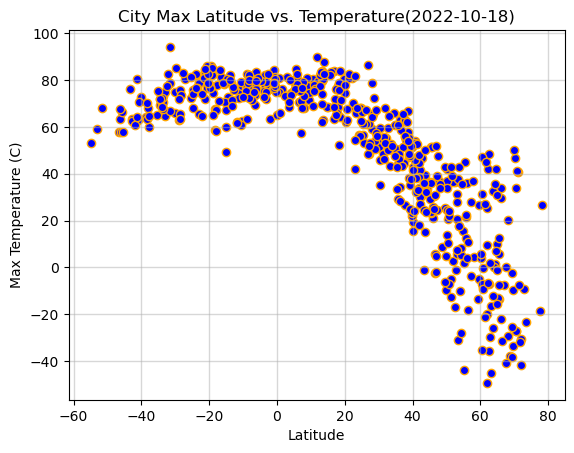

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor = "blue",edgecolor = "orange")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

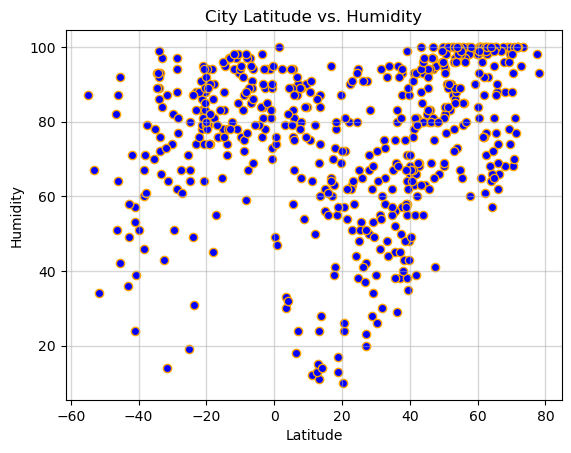

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor = "blue",edgecolor = "orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

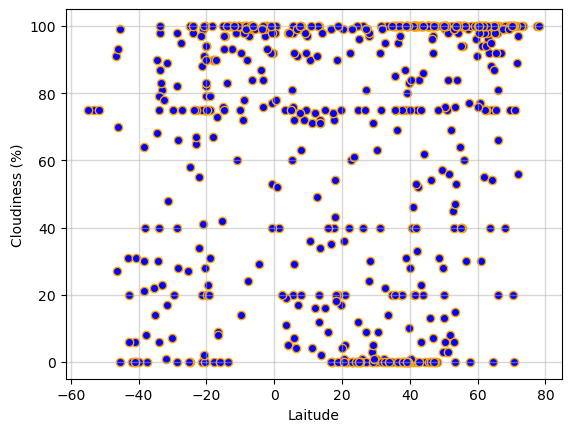

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor = "blue",edgecolor = "orange")


# Incorporate the other graph properties
# plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

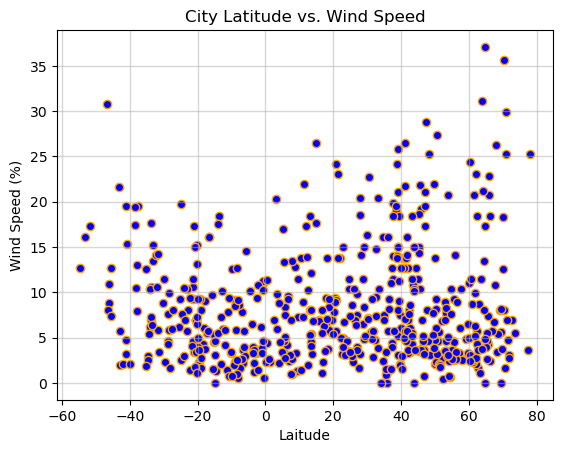

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor = "blue",edgecolor = "orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Date,Wind Speed
City_ID,,,,,,,,,
0,Pedernales,18.0384,-71.7440,77.36,73,43,DO,1675723491,9.33
2,Gemona,46.2794,13.1431,30.52,69,54,IT,1675723491,3.85
4,Clyde River,70.4692,-68.5914,-27.17,68,20,CA,1675723492,8.05
5,Aklavik,68.2191,-135.0107,-29.20,68,40,CA,1675723493,3.44
6,Leskovik,40.1514,20.5972,19.26,68,28,AL,1675723493,5.28


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Date,Wind Speed
City_ID,,,,,,,,,
1,Burnie,-41.0667,145.9167,62.94,57,6,AU,1675723491,4.74
3,Busselton,-33.6500,115.3333,67.33,72,98,AU,1675723492,10.54
7,Punta Arenas,-53.1500,-70.9167,59.11,67,75,CL,1675723494,16.11
8,Puerto Ayora,-0.7393,-90.3518,84.16,73,53,EC,1675723494,11.01
13,Ushuaia,-54.8000,-68.3000,53.22,87,75,AR,1675723296,12.66


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.409x + 93.61
The r-squared is: -0.8432025676452923


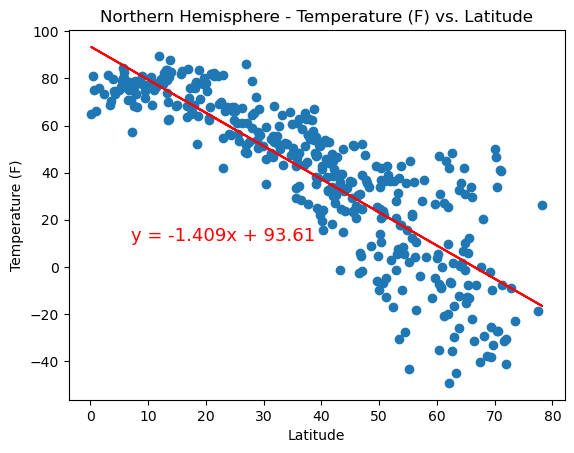

In [19]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(7,11),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig5.png")
plt.show()

Regression line equation is: y = 0.24x + 78.77
The r-squared is: 0.41815452398346775


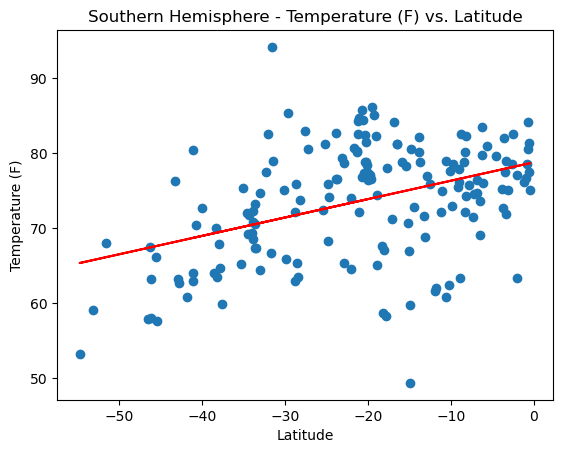

In [20]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(7,11),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.49x + 54.45
The r-squared is: 0.44504030803727235


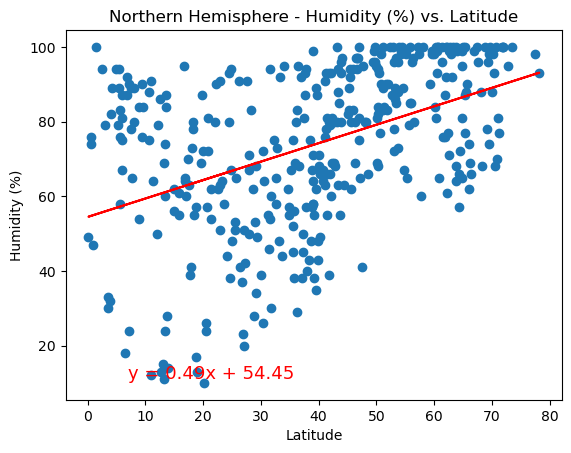

In [21]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(7,11),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig7.png")
plt.show()

Regression line equation is: y = 0.56x + 89.82
The r-squared is: 0.4431216274067584


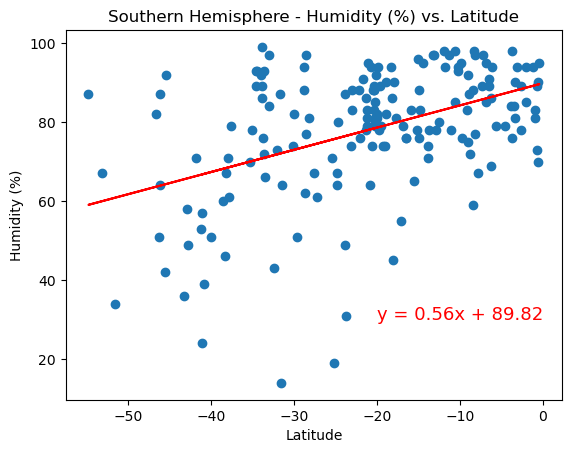

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-20,30),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.53x + 40.87
The r-squared is: 0.2643168165241964


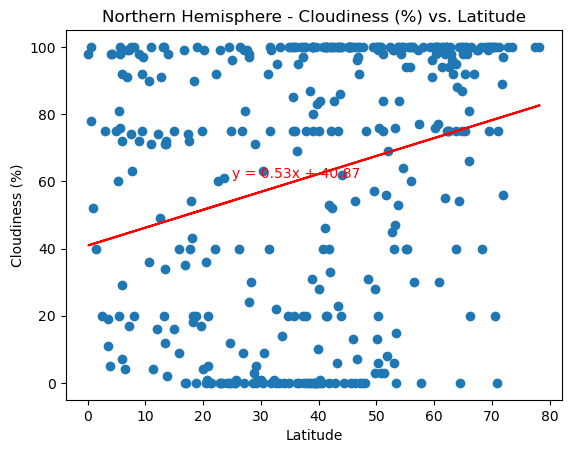

In [23]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(25,61),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig9.png")
plt.show()

Regression line equation is: y = 1.21x + 91.18
The r-squared is: 0.4444110076390038


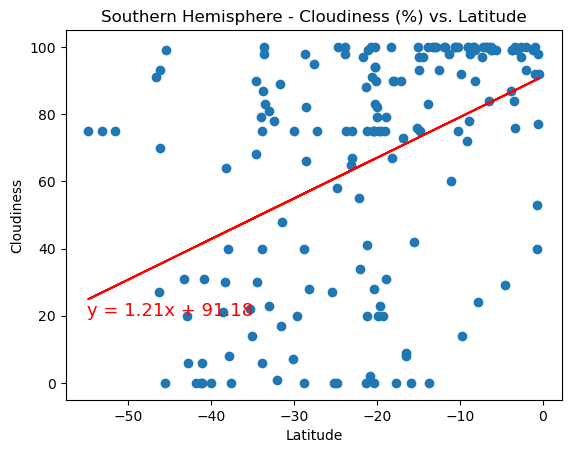

In [24]:
# Southern Hemisphere
southern_hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-55,20),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.03x + 7.53
The r-squared is: 0.077199340569251


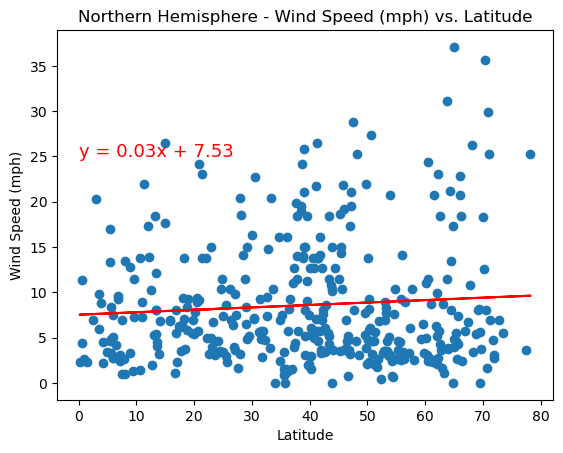

In [25]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(0,25),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

print(f"The r-squared is: {rvalue}")

plt.savefig("../output_data/Fig11.png")
plt.show()

Regression line equation is: y = -0.15x + 4.13
The r-squared is: -0.38403727225158985
there is a correlation of -0.4


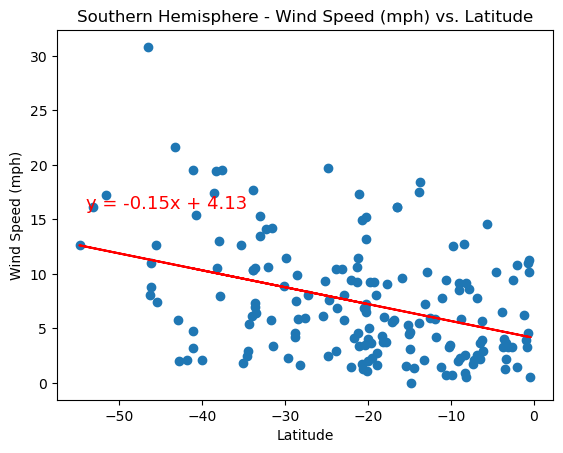

In [26]:
# Southern Hemisphere
southern_hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-54,16),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("there is a correlation of -0.4")

plt.savefig("../output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE